<a href="https://colab.research.google.com/github/Chaki0981/K-Means_Online_Retail_data/blob/master/K_Means_clus_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import dependencies

In [ ]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Import Data

### 2.1 Load data

In [ ]:
df = pd.read_csv('/content/OnlineRetail.csv', encoding='unicode_escape')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 2.2 Preprocess/cleaning data

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df.shape

(406829, 8)

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('int').astype('str')

In [ ]:
df['Total'] = df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   Total        406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


## 3. Visualize data

In [ ]:
country_counts = df.Country.value_counts()
country_counts

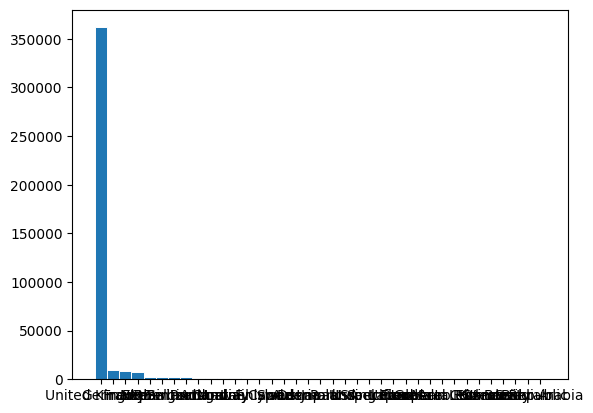

In [ ]:
fig, ax = plt.subplots()

ax.bar(country_counts.index, country_counts.values, width=1, edgecolor="white", linewidth=0.7)

plt.show()

## 4. Create training data

In [ ]:
df_total = df.groupby('CustomerID')['Total'].sum()
df_total = df_total.reset_index()

In [ ]:
df_total.head()

,CustomerID,Total
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [ ]:
df_freq = df.groupby('CustomerID')['InvoiceNo'].count()
df_freq = df_freq.reset_index()
df_freq.head()

,CustomerID,InvoiceNo
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [ ]:
ndf = pd.merge(df_total, df_freq, on='CustomerID', how='inner')
ndf.head()

,CustomerID,Total,InvoiceNo
0,12346,0.00,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


In [ ]:
ndf.shape

(4372, 3)

In [ ]:
latest_order = df['InvoiceDate'].max()

In [ ]:
latest_order

Timestamp('2011-12-10 17:19:00')

In [ ]:
df['Diff'] = latest_order - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30,697 days 08:53:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,697 days 08:53:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00,697 days 08:53:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,697 days 08:53:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,697 days 08:53:00


In [ ]:
df_diff = df.groupby('CustomerID')['Diff'].min()
df_diff = df_diff.reset_index()
df_diff.head()

,CustomerID,Diff
0,12346,326 days 07:02:00
1,12347,40 days 04:54:00
2,12348,76 days 04:06:00
3,12349,19 days 07:28:00
4,12350,311 days 01:18:00


In [ ]:
ndf = pd.merge(ndf, df_diff, on='CustomerID', how='inner')
ndf.head()

,CustomerID,Total,InvoiceNo,Diff
0,12346,0.00,2,326 days 07:02:00
1,12347,4310.00,182,40 days 04:54:00
2,12348,1797.24,31,76 days 04:06:00
3,12349,1757.55,73,19 days 07:28:00
4,12350,334.40,17,311 days 01:18:00


In [ ]:
ndf['Diff'] = ndf['Diff'].dt.days

In [ ]:
ndf.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']

In [ ]:
train_df = ndf[['Amount', 'Frequency', 'Recency']]

In [ ]:
train_df.head()

,Amount,Frequency,Recency
0,0.00,2,326
1,4310.00,182,40
2,1797.24,31,76
3,1757.55,73,19
4,334.40,17,311


## 4. Data standarizing

In [ ]:
scaler = StandardScaler()

In [ ]:
train_df_scaled = scaler.fit_transform(train_df)
train_df_scaled.shape

(4372, 3)

In [ ]:
train_df_scaled

array([[-0.23100099, -0.3917197 ,  1.97560006],
       [ 0.29343167,  0.38265697, -0.53502522],
       [-0.01231622, -0.26695902, -0.21900246],
       ...,
       [-0.20951263, -0.34439668, -0.06976949],
       [ 0.02390005,  2.85205812, -0.79837752],
       [-0.00744423, -0.0991774 , -0.88616162]])

In [ ]:
train_df_scaled = pd.DataFrame(train_df_scaled)

In [ ]:
train_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
train_df_scaled.head()

,Amount,Frequency,Recency
0,-0.231001,-0.391720,1.975600
1,0.293432,0.382657,-0.535025
2,-0.012316,-0.266959,-0.219002
3,-0.017146,-0.086271,-0.719372
4,-0.190312,-0.327188,1.843924


## 5. K-Means model creation

### 5.1 Finding optimal number of clusters

For finding optimal number of cluster I'm using **Elbow method**.

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto")
    kmeans.fit(train_df_scaled)
    wcss.append(kmeans.inertia_)

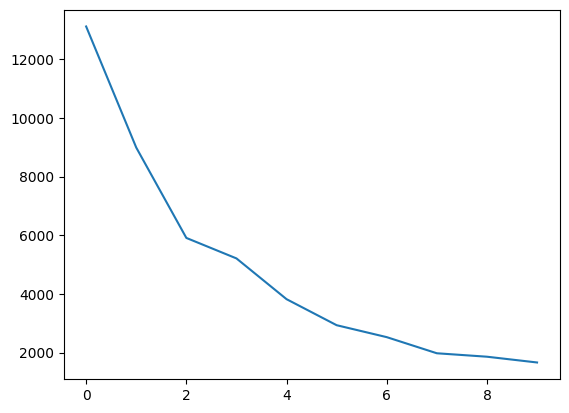

In [ ]:
plt.plot(wcss)

It look like **3** is optimal number of clusters.

### 5.2 K-Means Model

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")

In [ ]:
kmeans.fit(train_df_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [ ]:
y_kmeans = kmeans.labels_

In [ ]:
ndf['Claster'] = y_kmeans

In [ ]:
ndf.head()

,CustomerID,Amount,Frequency,Recency,Claster
0,12346,0.00,2,326,2
1,12347,4310.00,182,40,0
2,12348,1797.24,31,76,0
3,12349,1757.55,73,19,0
4,12350,334.40,17,311,2


# Test